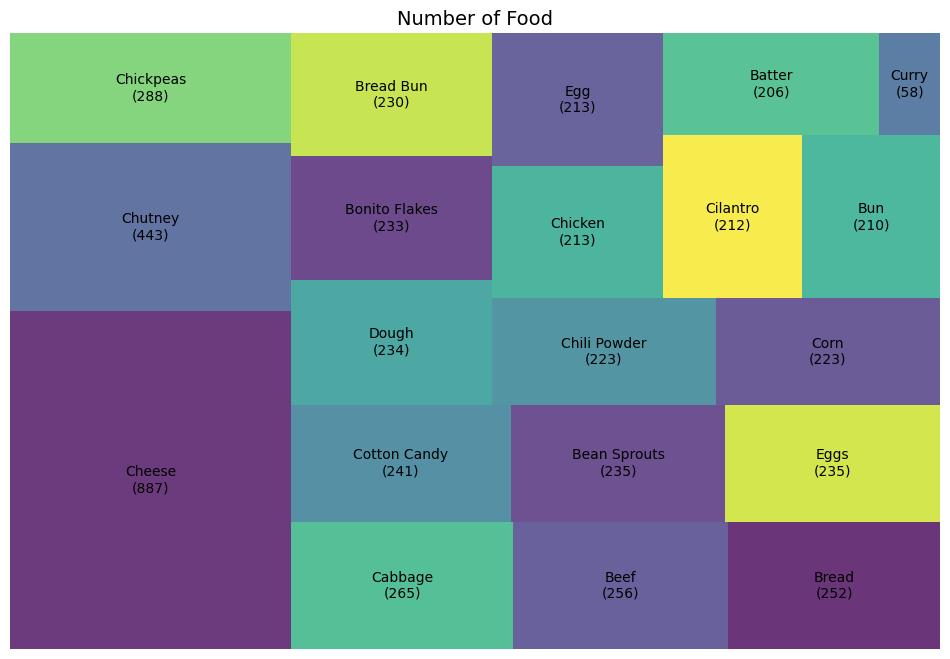

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Exploratory Data Analysis (EDA) - Tree Map Most Ingredient Used In Dish
# Dataset
df = pd.read_csv("global_street_food.csv")

# Extract 'Ingredient' from the first word of the 'Ingredients' column
df['Ingredient'] = df['Ingredients'].str.split(", ")
df = df.explode('Ingredient')

total_context = df.groupby('Ingredient')['Dish Name'].count().reset_index().head(20)

# Sort 
total_context = total_context.sort_values(by='Dish Name', ascending=False)

# Extract
sizes = total_context['Dish Name']
labels = total_context.apply(lambda x: f"{x['Ingredient']}\n({x['Dish Name']})", axis=1)

# Plot Tree Map
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title("Number of Food", fontsize=14)
plt.axis('off')
plt.show()